In [10]:
import cv2
import matplotlib.pyplot as plt
import csv
import os
%matplotlib inline

In [19]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np

test_image_paths = ["train/class1/image_1.jpg"]  # Список путей к тестовым изображениям
# Путь к папке с изображениями
folder_path = "C:/Users/spark/PycharmProjects/image_matching/train/class1"

# Получение списка путей ко всем изображениям в папке
train_image_paths = []

for filename in os.listdir(folder_path):
    if filename.endswith(".jpg") or filename.endswith(".png"):  # Фильтр только для файлов с определенным расширением
        image_path = os.path.join(folder_path, filename)
        train_image_paths.append(image_path)

print(train_image_paths)

# Пример загрузки и предобработки изображений
def load_and_preprocess_image(image_path):
    img = load_img(image_path, target_size=(200, 200))
    img_array = img_to_array(img)
    return img_array

# Загрузка и предобработка обучающих изображений
X_train = []
for image_path in train_image_paths:
    processed_image = load_and_preprocess_image(image_path)
    X_train.append(processed_image)

# Загрузка и предобработка тестовых изображений
X_test = []
for image_path in test_image_paths:
    processed_image = load_and_preprocess_image(image_path)
    X_test.append(processed_image)

# Преобразование в numpy array
X_train = np.array(X_train)
X_test = np.array(X_test)
print(X_test)

['C:/Users/spark/PycharmProjects/image_matching/train/class1\\image_1.jpg', 'C:/Users/spark/PycharmProjects/image_matching/train/class1\\image_2.jpg', 'C:/Users/spark/PycharmProjects/image_matching/train/class1\\image_3.jpg', 'C:/Users/spark/PycharmProjects/image_matching/train/class1\\image_4.jpg', 'C:/Users/spark/PycharmProjects/image_matching/train/class1\\image_5.jpg', 'C:/Users/spark/PycharmProjects/image_matching/train/class1\\image_6.jpg']
[[[[130. 123. 117.]
   [131. 122. 117.]
   [130. 123. 117.]
   ...
   [225. 225. 225.]
   [225. 225. 225.]
   [217. 217. 219.]]

  [[129. 122. 116.]
   [130. 121. 116.]
   [129. 122. 116.]
   ...
   [223. 223. 223.]
   [221. 221. 221.]
   [215. 215. 217.]]

  [[130. 123. 117.]
   [130. 123. 117.]
   [128. 121. 115.]
   ...
   [221. 221. 221.]
   [216. 216. 216.]
   [219. 219. 221.]]

  ...

  [[ 71.  81.  80.]
   [ 69.  79.  78.]
   [ 72.  82.  83.]
   ...
   [158. 157. 155.]
   [157. 156. 154.]
   [162. 158. 157.]]

  [[ 70.  80.  79.]
   [ 7

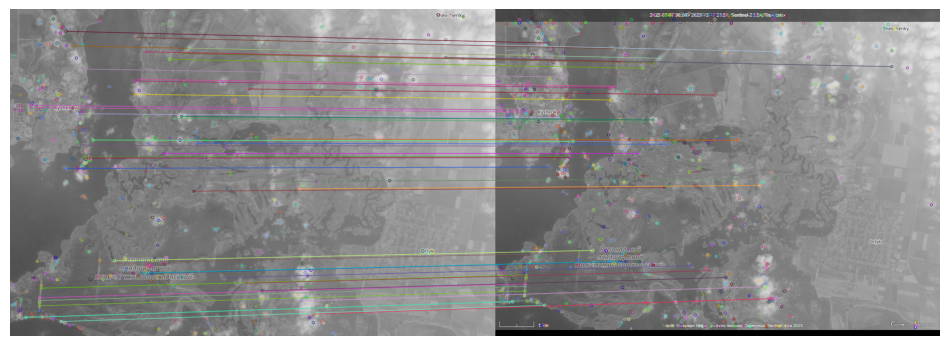

My Accuracy: 43.315 %


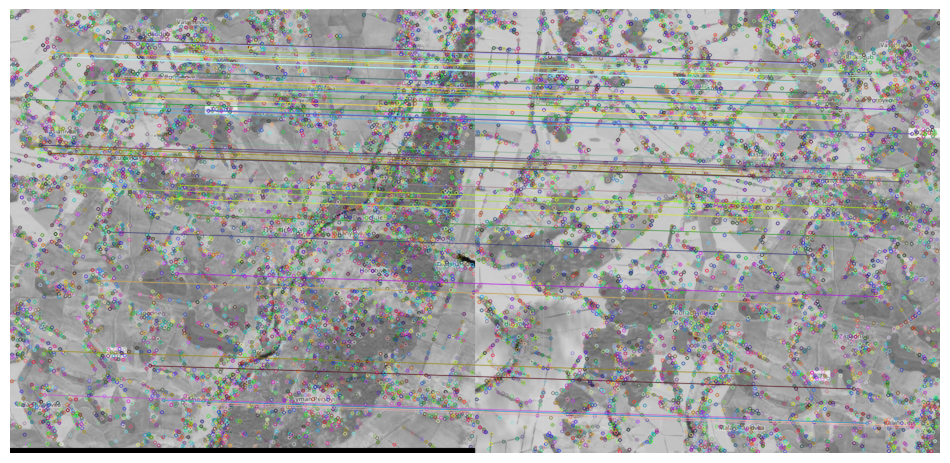

My Accuracy: 41.929 %


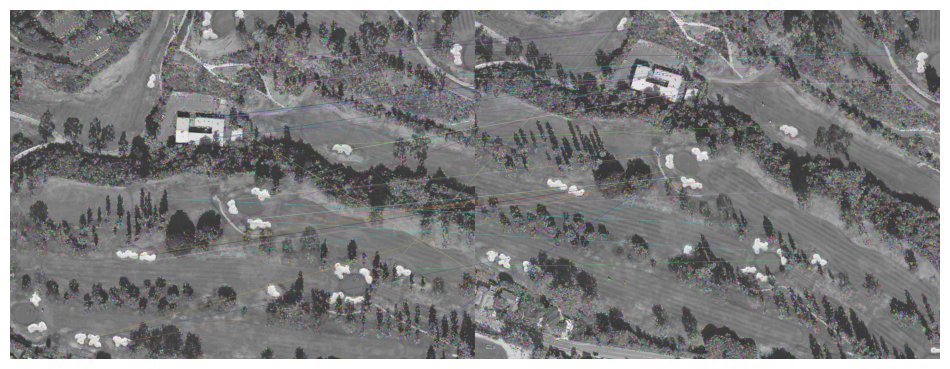

My Accuracy: 23.381 %


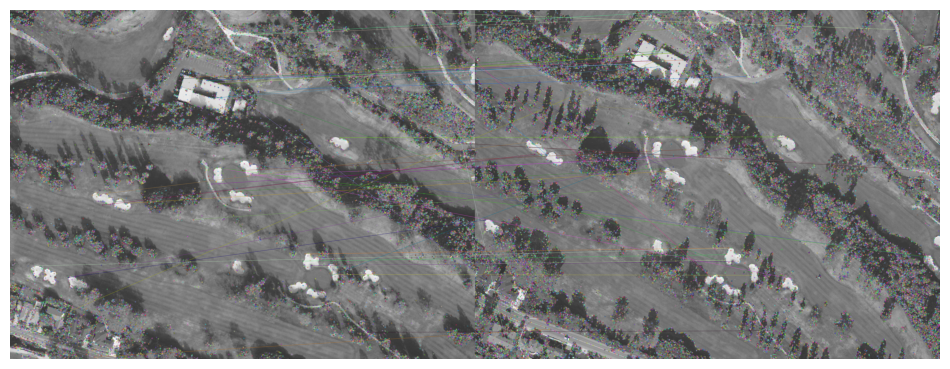

My Accuracy: 19.421 %


In [11]:
# # read images
# # Путь к папке с изображениями
# folder_path = "C:/Users/spark/PycharmProjects/image_matching/train/class1"
#
# # Имя CSV-файла с парами изображений
# csv_file = 'one.csv'
#
# # Чтение имен файлов из CSV-файла
# image_pairs = []
# with open(csv_file, 'r') as file:
#     csv_reader = csv.reader(file)
#     headers = next(csv_reader)  # Пропускаем заголовок
#     for row in csv_reader:
#         image_pairs.append((row[0], row[1]))  # Пары изображений из CSV
#
# # Загрузка изображений
# for pair in image_pairs:
#     img1_path = os.path.join(folder_path, pair[0])
#     img2_path = os.path.join(folder_path, pair[1])
#
#     img1 = cv2.imread(img1_path)
#     img2 = cv2.imread(img2_path)
#
#     # # Img Rotation
#     # height, width = img2.shape[:2]
#     # rotation_matrix = cv2.getRotationMatrix2D((width / 2, height / 2), 360, 2)
#     # img2 = cv2.warpAffine(img2, rotation_matrix, (width, height))
#
#     img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
#     img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
#
#     #sift
#     sift = cv2.SIFT_create()
#
#     keypoints_1, descriptors_1 = sift.detectAndCompute(img1,None)
#     keypoints_2, descriptors_2 = sift.detectAndCompute(img2,None)
#
#     #feature matching
#     bf = cv2.BFMatcher(cv2.NORM_L1, crossCheck=True)
#
#     matches = bf.match(descriptors_1,descriptors_2)
#     matches = sorted(matches, key = lambda x:x.distance)
#
#     # img3 = cv2.drawMatches(img1, keypoints_1, img2, keypoints_2, matches[:50], None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
#     img3 = cv2.drawMatches(img1, keypoints_1, img2, keypoints_2, matches[:50], None)
#
#     plt.figure(figsize=(12, 8))
#     plt.imshow(cv2.cvtColor(img3, cv2.COLOR_BGR2RGB))
#     plt.axis('off')
#     plt.show()
#
#     accuracy = []
#
#     accuracy2 = len(matches) / max(len(keypoints_1), len(keypoints_2))
#     print(f"My Accuracy: {accuracy2 * 100:.3f} %")
#     accuracy.append(accuracy2 * 100)

Accuracy: 2.84%


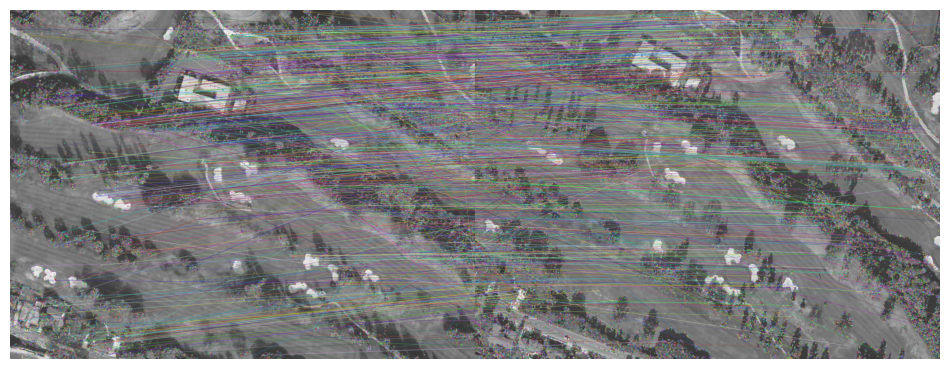

In [12]:

# # Изменение порогового значения для фильтрации совпадений
# bf = cv2.BFMatcher()
# matches = bf.knnMatch(descriptors_1, descriptors_2, k=2)
#
# good_matches = []
# for match_pair in matches:
#     if len(match_pair) == 2:
#         m, n = match_pair
#         if m.distance < 0.8 * n.distance:  # Изменение порогового значения здесь
#             good_matches.append(m)
#
# # Оценка точности на основе хороших сопоставлений
# accuracy = len(good_matches) / len(matches) if len(matches) > 0 else 0
# print(f"Accuracy: {accuracy * 100:.2f}%")
#
# # Отрисовка хороших сопоставлений
# # img_matches = cv2.drawMatches(img1, keypoints_1, img2, keypoints_2, good_matches, None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
#
# img_matches = cv2.drawMatches(img1, keypoints_1, img2, keypoints_2, good_matches, None)
#
# # Преобразование изображения OpenCV в изображение Matplotlib для отображения
# plt.figure(figsize=(12, 8))
# plt.imshow(cv2.cvtColor(img_matches, cv2.COLOR_BGR2RGB))
# plt.axis('off')
# plt.show()